### Unsupervised Learnin Clustering France Weather Data

We load the Weather data for each town in France with more then 10000 inhabitants into the notebook.

In [ ]:
f = open('weather_for_villes.pickle','rb')

In [ ]:
import pickle
meteo = pickle.load(f)
f.close()

The data imported is provided in JavaScript Object Notation (JSON) format. It can be accessed like the following for 2nd city stored in the dataset.

In [ ]:
meteo[1].json()

{'request': {'type': 'LatLon',
  'query': 'Lat 46.25 and Lon 5.67',
  'language': 'en',
  'unit': 'm'},
 'location': {'name': 'Oyannax',
  'country': 'France',
  'region': 'Rhone-Alpes',
  'lat': '46.250',
  'lon': '5.667',
  'timezone_id': 'Europe/Paris',
  'localtime': '2020-04-30 00:30',
  'localtime_epoch': 1588206600,
  'utc_offset': '2.0'},
 'current': {'observation_time': '10:30 PM',
  'temperature': 8,
  'weather_code': 302,
  'weather_icons': ['https://assets.weatherstack.com/images/wsymbols01_png_64/wsymbol_0034_cloudy_with_heavy_rain_night.png'],
  'weather_descriptions': ['Moderate rain'],
  'wind_speed': 6,
  'wind_degree': 223,
  'wind_dir': 'SW',
  'pressure': 1009,
  'precip': 10,
  'humidity': 98,
  'cloudcover': 100,
  'feelslike': 7,
  'uv_index': 1,
  'visibility': 6,
  'is_day': 'no'}}

In [ ]:
import pandas as pd
villes = pd.read_csv('villes.csv')

The weather data was originally obtained using a REST API, which are API calls over HTTP to query various databases.

In python one can easily interact with REST APIs using the requests library.

```
import requests
```



In [ ]:
import requests

params = {
  'access_key': 'mon-clef',
  'query': '46.1000,5.81667'
}

api_result = requests.get('http://api.weatherstack.com/current', params)
api_response = api_result.json()

In [ ]:
villes

,No,Dep,Nom,pop 2010,longdeg,latdeg
0,0,1,amberieu en bugey,13835,5.35000,45.9500
1,1,1,oyonnax,22650,5.66667,46.2500
2,2,1,bellegarde sur valserine,11790,5.81667,46.1000
3,3,1,bourg en bresse,40088,5.21667,46.2000
4,4,1,gex,10372,6.06667,46.3333
...,...,...,...,...,...,...
884,884,95,eragny,16886,2.10000,49.0167
885,885,95,sarcelles,58614,2.38333,49.0000
886,886,95,soisy sous montmorency,17428,2.30000,48.9833
887,887,95,enghien les bains,11809,2.31667,48.9667


A pickle in python allows you to serialize (store) python data objects to files. This is the way we loaded the weather data for all the cities. Here we give a quick example of how this works:

In [ ]:
a = [1,2,3,4]

In [ ]:
fout = open('my_list.pickle','wb')
pickle.dump(a, fout)
fout.close()

In [ ]:
fin = open('my_list.pickle','rb')
my_list = pickle.load(fin)
fin.close()

In [ ]:
my_list

[1, 2, 3, 4]

We could conviniently load the cities data, but not the weather data into a pandas dataframe. Here we transform the data stored in the JSON format into lists, that we can conviniently add to our PANDAS dataframe.

In [ ]:
temp=[]
wind=[]
hum=[]
pressure=[]
for i in range(len(meteo)):
  temp.append(meteo[i].json()['current']['temperature'])
  wind.append(meteo[i].json()['current']['wind_speed'])
  hum.append(meteo[i].json()['current']['humidity'])
  pressure.append(meteo[i].json()['current']['pressure'])


In [ ]:
villes['temp'] = temp
villes['wind'] = wind
villes['hum'] = hum
villes['pressure'] = pressure

Our final dataframe

In [ ]:
villes

,No,Dep,Nom,pop 2010,longdeg,latdeg,temp,wind,hum,pressure
0,0,1,amberieu en bugey,13835,5.35000,45.9500,10,7,96,1009
1,1,1,oyonnax,22650,5.66667,46.2500,8,6,98,1009
2,2,1,bellegarde sur valserine,11790,5.81667,46.1000,8,6,98,1009
3,3,1,bourg en bresse,40088,5.21667,46.2000,9,6,98,1009
4,4,1,gex,10372,6.06667,46.3333,11,0,82,1011
...,...,...,...,...,...,...,...,...,...,...
884,884,95,eragny,16886,2.10000,49.0167,9,7,87,1003
885,885,95,sarcelles,58614,2.38333,49.0000,11,13,82,1004
886,886,95,soisy sous montmorency,17428,2.30000,48.9833,11,13,82,1004
887,887,95,enghien les bains,11809,2.31667,48.9667,11,13,82,1004


In order to be able to view data on a map we have to install several libraries into the machine provided by colab. Note that the "!" mark runs a shell program,as if it would be run outside the notebook in a unix terminal. Here we use apt, like on debian or ubuntu to install packages into the machine.

In [ ]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.10.2-1).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (8.2.1-1).
libproj-dev set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 154 kB of archives.
After this operation, 492 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 proj-bin amd64 8.2.1-1 [154 kB]
Fetched 154 kB in 0s (568 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../proj-bin_8.2.1-1_amd64.deb ...
Unpacking proj-bin (8.2.1-1) ...
Setting up proj-bin (8.2.1-1) ...
Processing triggers for man-db (2.10.2-1) ...


Further we use pip to install python libraries. In this case basemap and dependencies.

In [ ]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 43.8 MB/s eta 0:00:00


We select from the Dataframe only the weather data that we will cluster. Hence, we want clusters of similar weather.

In [ ]:
X = villes.loc[:,['temp','wind','hum','pressure']].copy()

X is the input to our clustering run, holding the features, here weather properties, for each sample, here towns in France.

Y normaly attributed to the labels in supervised machine learning. Here we want the algorithm to attribute labels automatically to our "samples" by similarity.

In [ ]:
X

,temp,wind,hum,pressure
0,10,7,96,1009
1,8,6,98,1009
2,8,6,98,1009
3,9,6,98,1009
4,11,0,82,1011
...,...,...,...,...
884,9,7,87,1003
885,11,13,82,1004
886,11,13,82,1004
887,11,13,82,1004


 We see that pressure for instance yields very large values, while temperature yields values in a compleatly different range. Such large differences in units inside the data are very hard to process by the distance measure. As such we will rescale all the data:

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

While all the data has been preserved we see looking at the 2nd value in the scaled dataset that all of the values are in the same ranges.

In [ ]:
X_scaled[1]

array([-1.56263328, -1.25784758,  1.66365969,  0.62905784])

We proceeed to clustering the weatherdata with DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=0.9, min_samples=20,metric='l2').fit(X_scaled)

In [ ]:
db.labels_.max()

4

In order to highlight each town on thee map we have to convert each cluster to a color. This is what we do below. At y the same time we count how many town have not been attributed to a cluster and have as such, such a different weather that they were declared to be outliers.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
colors = plt.get_cmap('jet')(np.linspace(0.0,1.0,db.labels_.max()+1))
non_clusters = 0
c = []
for i in range(len(db.labels_)):
  if db.labels_[i] == -1:
    c.append([0.4,0.4,0.4])
    non_clusters = non_clusters + 1
  else:
    c.append(colors[db.labels_[i]])

Number of outliers:

In [ ]:
non_clusters

161

Total number of towns in the dataset:

In [ ]:
len(villes)

889

*Plotting a Map of France

In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
my_map = Basemap(projection='merc',resolution='l',area_thresh=1000,
                 llcrnrlon = -5.0, llcrnrlat=42.0,
                 urcrnrlon = 8.0, urcrnrlat=52.0)

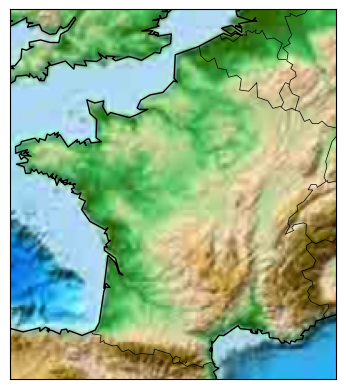

In [ ]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
my_map.etopo()

*Plot found clusters -> This step has to be performed after "Prepare the obtained clusters for plotting" please continue below

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1062: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


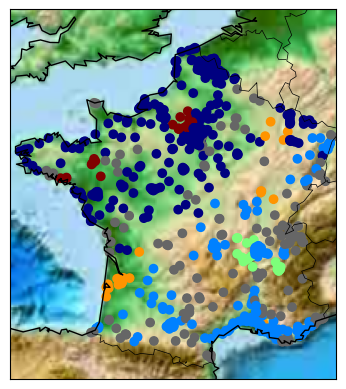

In [ ]:
x,y = my_map(villes['longdeg'].to_numpy(),villes['latdeg'].to_numpy())
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
my_map.etopo()
my_map.scatter(x,y,c=c)

Play with the parameters to the DBSCAN algorithm and see how the map changes. Also try to change the distance metric from L2, the Euklidean distance, to L1, absolute distances and find new parameters.

In [ ]:
https://scikit-learn.org/stable/modules/clustering.html